In [ ]:
pip install opencv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv2 (from versions: none)
ERROR: No matching distribution found for opencv2


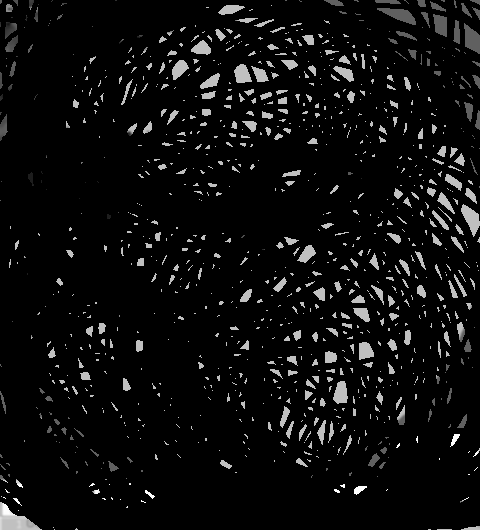

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the image
img = cv2.imread("/content/ezgif.com-gif-maker.jpg", 0)

# Apply Gaussian Blur to remove noise
img = cv2.GaussianBlur(img, (5, 5), 0)

# Use HoughCircles to detect circles in the image
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Convert the (x, y) coordinates and radius of the circles to integers
circles = np.round(circles[0, :]).astype("int")

# Loop over the circles and draw them on the original image
for (x, y, r) in circles:
    cv2.circle(img, (x, y), r, (0, 255, 0), 4)

# Show the resulting image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


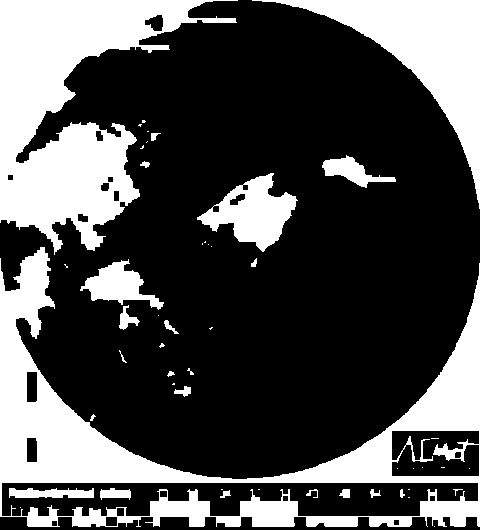

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans

# Load the radar image
img = cv2.imread("/content/ezgif.com-gif-maker.jpg", 0)

# Flatten the image into a 1-D array
flat_img = img.reshape(-1, 1)

# Perform KMeans clustering on the image
kmeans = KMeans(n_clusters=2).fit(flat_img)

# Get the cluster labels for each pixel
labels = kmeans.labels_

# Reshape the labels into the original image shape
labels = labels.reshape(img.shape)

# Create a binary image where the clouds are white and the background is black
binary_img = np.zeros(img.shape, dtype=np.uint8)
binary_img[labels == 1] = 255

# Apply morphological operations to fill the gaps in the cloud regions
kernel = np.ones((5, 5), np.uint8)
binary_img = cv2.dilate(binary_img, kernel, iterations=1)
binary_img = cv2.erode(binary_img, kernel, iterations=1)

# Show the resulting image
#cv2_imshow(img)
cv2_imshow(binary_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2

# Load the radar image
img = cv2.imread("/content/WhatsApp Image 2023-02-09 at 16.31.11.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise in the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect lines in the image using the HoughLinesP function
lines = cv2.HoughLinesP(blurred, 1, np.pi/180, 50, minLineLength=50, maxLineGap=10)

# Create a black image with the same size as the original image
mask = np.zeros_like(img)

# Draw the lines on the black image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(mask, (x1, y1), (x2, y2), (255, 255, 255), 5)

# Invert the lines image
mask = cv2.bitwise_not(mask)

# Create a binary image where the clouds are white and the background is black
ret, binary_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Combine the binary image with the lines mask
result = cv2.bitwise_and(binary_img, mask)

# Apply morphological operations to fill the gaps in the cloud regions
kernel = np.ones((5, 5), np.uint8)
result = cv2.dilate(result, kernel, iterations=1)
result = cv2.erode(result, kernel, iterations=1)

# Color the clouds in the resulting image
result = cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)
result[np.where(result == [255, 255, 255])] = [0, 255, 0]

# Show the resulting image
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: ignored

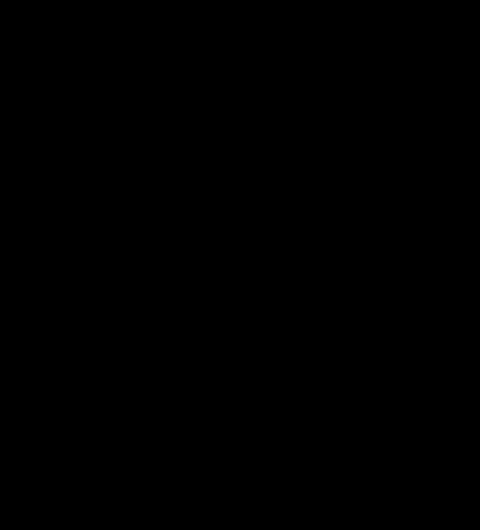

In [ ]:
import cv2
import numpy as np

# Load the radar image
img = cv2.imread("/content/WhatsApp Image 2023-02-09 at 16.31.11.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise in the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect circles in the image using the HoughCircles function
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Convert the output from the HoughCircles function to a usable format
circles = np.uint16(np.around(circles))

# Create a black image with the same size as the original image
mask = np.zeros_like(img)

# Draw the circles on the black image
for i in circles[0, :]:
    cv2.circle(mask, (i[0], i[1]), i[2], (255, 255, 255), -1)

# Invert the circles image
mask = cv2.bitwise_not(mask)

# Combine the original image with the circles mask
result = cv2.bitwise_and(img, mask)

# Show the resulting image
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


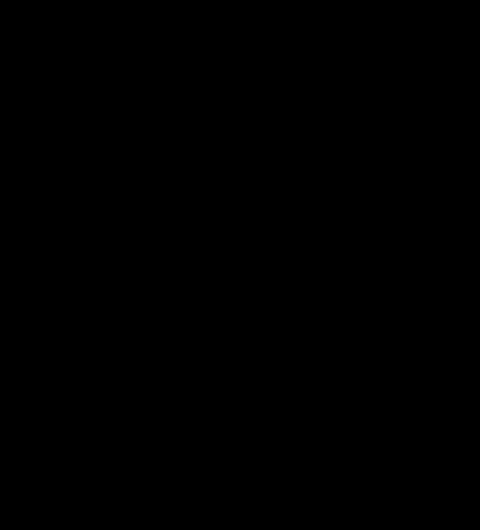

In [ ]:
import cv2
import numpy as np

# Load the radar image
img = cv2.imread("/content/result_complicated.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise in the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect circles in the image using the HoughCircles function
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Convert the output from the HoughCircles function to a usable format
circles = np.uint16(np.around(circles))

# Create a black image with the same size as the original image
mask = np.zeros_like(img)

# Draw the circles on the black image
for i in circles[0, :]:
    cv2.circle(mask, (i[0], i[1]), i[2], (255, 255, 255), -1)

# Invert the circles image
mask = cv2.bitwise_not(mask)

# Combine the original image with the circles mask
result = cv2.bitwise_and(img, mask)

# Show the resulting image
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans

def detect_clouds(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise in the image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to remove non-cloud pixels
    _, thresh = cv2.threshold(blurred, 240, 255, cv2.THRESH_BINARY)

    # Find the contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an array to store the centroids of the contours
    centroids = []
    for cnt in contours:
        M = cv2.moments(cnt)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        centroids.append([cx, cy])

    # Convert the centroids array to a numpy array
    centroids = np.array(centroids)
    # Convert the centroids array to a numpy array
    centroids = np.array(centroids)

    # Check if the centroids array is not empty
    if centroids.shape[0] > 0:
    # Reshape the centroids array to a 2D array
      centroids = centroids.reshape(-1, 2)


      # Run the KMeans algorithm to cluster the centroids
      kmeans = KMeans(n_clusters=1, random_state=0).fit(centroids)

      # Get the cluster label for each centroid
      labels = kmeans.labels_

      # Create a black image with the same size as the original image
      mask = np.zeros_like(image)

      # Loop through the centroids and draw the contour corresponding to each centroid in the same cluster
      for i, centroid in enumerate(centroids):
          if labels[i] == 0:
              cv2.drawContours(mask, [contours[i]], 0, (255, 255, 255), -1)

      # Combine the original image with the contours mask
      result = cv2.bitwise_and(image, mask)

      return result

# Load the radar image
img = cv2.imread("/content/result_complicated.png")

# Call the detect_clouds function to return the image with only the clouds
clouds = detect_clouds(img)

# Show the resulting image
cv2_imshow(clouds)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: ignored